In [1]:
import numpy as np
import pandas as pd

In [2]:
p_dataframe = pd.read_csv("listings.csv", sep=",")

C:\Users\Murat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
p_dataframe.head()

p_dataframe["id"] = p_dataframe.index + 1
p_dataframe.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'distance', 'Coordinate'],
      dtype='object', length=108)

In [4]:
# how many people can accommodates in our apartment
our_acc_value = 3

# for testing the first value of the data difference between our our_acc_value
first_living_value = p_dataframe.loc[0, 'accommodates']
first_distance = np.abs(first_living_value - our_acc_value)
print(first_distance)

1


In [5]:
# Getting the value difference between our accommodate and other places' accomodation
p_dataframe['distance'] = np.abs(p_dataframe.accommodates - our_acc_value)
p_dataframe['distance'].head()

0    1
1    0
2    1
3    2
4    1
Name: distance, dtype: int64

In [32]:
# the same number of the accomodate place for people is number "0" 
# There are 2852 places in our data // accommodate the same number of people as our listing.
p_dataframe.distance.value_counts().sort_index()

0      2852
1     10972
2      4430
3      1129
4       328
5       367
6        86
7       159
8        29
9        69
10       17
11       24
12       12
13      139
Name: distance, dtype: int64

In [16]:
# selecting the %100 data from list. And suffle the data
p_dataframe = p_dataframe.sample(frac = 1, random_state=0)
p_dataframe = p_dataframe.sort_values('distance')
p_dataframe.shape
p_dataframe.price.head()

2732     $119.00
141      $306.00
20517    $113.00
16059    $147.00
17809     $62.00
Name: price, dtype: object

In [17]:
p_dataframe['price'] = p_dataframe.price.str.replace('\$|,', '').astype('float')
mean_price = p_dataframe.price.iloc[:5].mean()
mean_price

149.4

In [33]:
# Lets calculate difference between the distance between accomodates

In [18]:
p_dataframe["Coordinate"] = p_dataframe["latitude"].astype(str) + "," + p_dataframe["longitude"].astype(str)


In [19]:
p_dataframe["Coordinate"] = p_dataframe["latitude"].astype(str) + "," + p_dataframe["longitude"].astype(str)
p_dataframe["Coordinate"].str.split(",")[5][1]

'28.952540000000003'

#  Evaluating Our Model

In [20]:
p_dataframe.drop('distance', axis =1)
train_df = p_dataframe.copy().iloc[:2792]
train_df = train_df[(train_df["room_type"] == "Shared room")]
test_df = p_dataframe.copy().iloc[2792:]
test_df = test_df[(test_df["room_type"] == "Shared room")]

In [21]:
def predict_distance(new_listing_value, feature_column):
    temp_df = train_df
    temp_df['Coord_dist'] = ((temp_df["latitude"]) - float(new_listing_value.split(",")[0])) ** (2) + \
                     ((temp_df["longitude"]) - float(new_listing_value.split(",")[1])) ** (2)
    temp_df = temp_df.sort_values('Coord_dist')
    kn = temp_df.price.iloc[:5]
    predicted_price = kn.mean()
    return predicted_price

In [22]:
test_df['price_dist'] = test_df.Coordinate.apply(predict_distance, feature_column = 'Coordinate')

In [23]:
test_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance,Coordinate,price_dist
1154,1155,https://www.airbnb.com/rooms/2765272,20190930030338,2019-09-30,besiktas private location,House opposite the Ciragan Palace,NaN,House opposite the Ciragan Palace,none,NaN,...,f,f,1,0,0,1,NaN,1,"41.04586,29.01342",178.2
9894,9895,https://www.airbnb.com/rooms/28914082,20190930030338,2019-09-30,Aile Evi,Cekyat kenarinda priz kisisel aydinlatma icin ...,NaN,Cekyat kenarinda priz kisisel aydinlatma icin ...,none,NaN,...,f,f,1,0,0,1,NaN,1,"41.050509999999996,28.8476",181.2
5279,5280,https://www.airbnb.com/rooms/15356751,20190930030338,2019-09-30,1 oda çift kişilik çekyat,Kurtköyde Sabiha Gökçen Havalimanı'na 2 km uza...,NaN,Kurtköyde Sabiha Gökçen Havalimanı'na 2 km uza...,none,Sabiha Gökçen Havalimanı'na 2 km uzaklıktadır...,...,f,f,1,0,0,1,NaN,1,"40.93196,29.306340000000002",133.8
5699,5700,https://www.airbnb.com/rooms/17603550,20190930030338,2019-09-30,LOVELY ROOM IN AN AMAZING REGION,The flat is just like you see in the photos . ...,NaN,The flat is just like you see in the photos . ...,none,NaN,...,f,f,2,0,1,1,NaN,1,"41.011959999999995,28.604870000000002",158.8
4751,4752,https://www.airbnb.com/rooms/13340836,20190930030338,2019-09-30,central location - 4 bed deluxe dorm ensuite,Stay Inn Taksim Hostel is a revolutionary host...,Stay Inn Taksim Hostel is a 32 bed hostel; its...,Stay Inn Taksim Hostel is a revolutionary host...,none,"Located in the heart of Beyoglu district, just...",...,f,f,11,0,0,11,0.07,1,"41.03608,28.97622",205.4


In [24]:
def predict_price__m(new_listing_value, feature_column):
    temp_df = test_df
    temp_df['distance'] = np.abs(temp_df[feature_column] - new_listing_value)
    temp_df = temp_df.sort_values('distance')
    kn = temp_df.price_dist.iloc[:5]
    predicted_price = kn.mean()
    return predicted_price

In [25]:
test_df['predicted_price'] = test_df.accommodates.apply(predict_price__m, feature_column = 'accommodates' ) /2
test_df.sort_values(['predicted_price','accommodates', 'price'])

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance,Coordinate,price_dist,predicted_price
8128,8129,https://www.airbnb.com/rooms/25333464,20190930030338,2019-09-30,6-Bed Female Dormitory Room with Private Bathroom,"Türkiye'nin ilk dizayn Hosteli ""Bunk Hostels"",...",NaN,"Türkiye'nin ilk dizayn Hosteli ""Bunk Hostels"",...",none,NaN,...,f,9,0,4,5,0.42,4,"41.044509999999995,28.98455",208.8,75.68
13146,13147,https://www.airbnb.com/rooms/33336381,20190930030338,2019-09-30,Superior 10 Bed Mixed Dorm Ensuite,TaksimCityHostel up and get ready to make some...,Superior 8 Bed Mixed Dorm Ensuite TaksimCityH...,TaksimCityHostel up and get ready to make some...,none,Nice and close to center.,...,f,8,5,0,3,NaN,6,"41.04002,28.981170000000002",208.8,77.04
14602,14603,https://www.airbnb.com/rooms/34806878,20190930030338,2019-09-30,Doğa ile başbaşa büyük bahçeli havuzlu müstaki...,"Tüm mutfak malzemeleri, yatak, nevresim takıml...",Türkiye ‘nin en büyük villa sitesi. Geniş evle...,"Tüm mutfak malzemeleri, yatak, nevresim takıml...",none,Tepekent villa sitesi Büyükçekmece- istanbul -...,...,f,1,0,0,1,NaN,6,"41.04039,28.505",158.8,77.04
17490,17491,https://www.airbnb.com/rooms/37086899,20190930030338,2019-09-30,Yeni havalimanina 5 dakika mesafede muhtesem v...,NaN,NaN,NaN,none,NaN,...,f,1,0,0,1,NaN,6,"41.29037,28.61921",98.6,77.04
5311,5312,https://www.airbnb.com/rooms/15471889,20190930030338,2019-09-30,treviro,Benim mekanımı şu yüzden seveceksiniz: ortam v...,NaN,Benim mekanımı şu yüzden seveceksiniz: ortam v...,none,NaN,...,f,1,0,0,1,NaN,15,"40.91267,29.196170000000002",132.8,86.34
8341,8342,https://www.airbnb.com/rooms/26038246,20190930030338,2019-09-30,"quiet , Tiny and comfy","10 minutes from train and bus station. A101, ...",very small so you won't lose your stuff,"10 minutes from train and bus station. A101, ...",none,very nice neighborhood,...,f,1,0,0,1,0.20,15,"41.01163,28.927090000000003",212.4,86.34
6315,6316,https://www.airbnb.com/rooms/20208056,20190930030338,2019-09-30,"Couch in hearth of Kadıköy,Yeldeğirmeni","A couch in the heart of Kadıkoy,Yeldeğirmeni i...",NaN,"A couch in the heart of Kadıkoy,Yeldeğirmeni i...",none,NaN,...,f,1,0,0,1,0.24,15,"40.99563,29.028290000000002",81.8,86.34
6171,6172,https://www.airbnb.com/rooms/19680286,20190930030338,2019-09-30,Taksim'de merkezi konumda daire,"Taksim meydana çok yakın konumda, İstiklal cad...",NaN,"Taksim meydana çok yakın konumda, İstiklal cad...",none,NaN,...,f,2,0,0,2,NaN,15,"41.033640000000005,28.981309999999997",267.8,86.34
6677,6678,https://www.airbnb.com/rooms/21396973,20190930030338,2019-09-30,"Free Breakfast, wifi, shower, coffee, couchsur...","Classical student room, I am student at Istanb...",Kadıköy / Acıbadem Kadıköy centrum 5/10 minute...,"Classical student room, I am student at Istanb...",none,NaN,...,f,1,0,0,1,NaN,15,"40.99691,29.04017",81.8,86.34
5127,5128,https://www.airbnb.com/rooms/14646881,20190930030338,2019-09-30,One-day survival couch near AirPort,I have a couch to share. Suitable for one day ...,-Living room is yours. I just pass by.,I have a couch to share. Suitable for one day ...,none,-Many kind of food you can call to house. -Th...,...,f,1,0,0,1,0.71,15,"40.86177,29.33413",133.8,86.34


In [27]:
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
mse = test_df['squared_error'].mean()
rmse = mse ** (1/2)
rmse

642.0112472541053

In [29]:
test_df[["price", "predicted_price"]].head()

,price,predicted_price
1154,119.0,103.06
9894,62.0,103.06
5279,142.0,103.06
5699,216.0,103.06
4751,79.0,104.74


In [55]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [48]:
price = test_df.price.values.reshape(-1,1).astype("int")

In [49]:
price

array([[  119],
       [   62],
       [  142],
       [  216],
       [   79],
       [   62],
       [  312],
       [  113],
       [  113],
       [  147],
       [   23],
       [   91],
       [  153],
       [   79],
       [  119],
       [  102],
       [  108],
       [   79],
       [  176],
       [   74],
       [   74],
       [   57],
       [  176],
       [  250],
       [  227],
       [   91],
       [  352],
       [   96],
       [   79],
       [   85],
       [  113],
       [   79],
       [   45],
       [  301],
       [   91],
       [   74],
       [  675],
       [   85],
       [  102],
       [   62],
       [  216],
       [   57],
       [  102],
       [  102],
       [   28],
       [  147],
       [  119],
       [  147],
       [   79],
       [   62],
       [   85],
       [  142],
       [  278],
       [  284],
       [  187],
       [   85],
       [  216],
       [  102],
       [   57],
       [  108],
       [   57],
       [  102],
       [

In [51]:
accommodates = test_df.accommodates.values.reshape(-1,1).astype("int")

In [52]:
accommodates

array([[ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 4],
       [ 2],
       [ 2],
       [ 4],
       [ 2],
       [ 2],
       [ 2],
       [ 4],
       [ 2],
       [ 2],
       [ 2],
       [ 4],
       [ 2],
       [ 4],
       [ 2],
       [ 4],
       [ 2],
       [ 2],
       [ 2],
       [ 4],
       [ 2],
       [ 2],
       [ 4],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 4],
       [ 2],
       [ 2],
       [ 4],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 4],
       [ 2],
       [ 4],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 4],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 4],
       [ 2],

In [53]:
predicted_price = test_df.predicted_price.values.reshape(-1,1).astype("int")

In [54]:
regression = LinearRegression()
regression.fit(accommodates, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

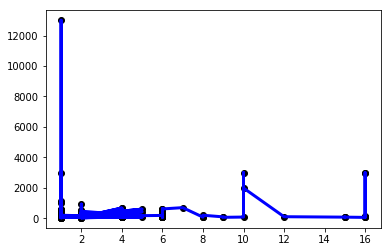

In [67]:
plt.scatter(accommodates, price,  color='black')
plt.plot(accommodates, price, color='blue', linewidth=3)
plt.show()

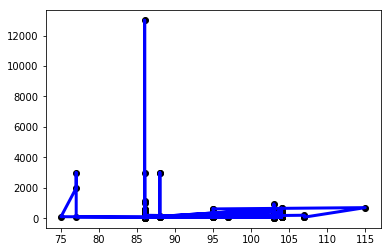

In [66]:
plt.scatter(predicted_price, price,  color='black')
plt.plot(predicted_price, price, color='blue', linewidth=3)
plt.show()

In [61]:
price_df = p_dataframe.price.values.reshape(-1,1).astype("int")

In [62]:
accommodates_df = p_dataframe.accommodates.values.reshape(-1,1).astype("int")

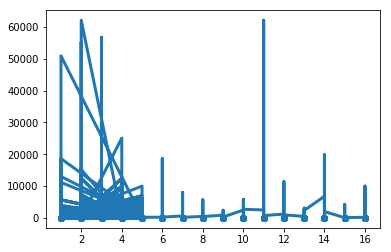

In [65]:
plt.scatter(accommodates_df, accommodates_df)
plt.plot(accommodates_df, price_df, linewidth=3)
plt.show()